In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = 'https://www.worldometers.info/coronavirus/'
page = requests.get(url)
soup = BeautifulSoup(page.text)


covidtable = soup.find('table', {'id' : 'main_table_countries_today'})

headers = []
for i in covidtable.find_all('th'):
    title = i.text.strip()
    headers.append(title)
    
df = pd.DataFrame(columns = headers)
df

for j in covidtable.find_all('tr', {'style':''})[1:]:
    row = j.find_all('td')
    rowdata = [td.text.strip() for td in row]
    length = len(df)
    df.loc[length] = rowdata

In [ ]:
df

In [ ]:
df.to_csv('covidtable.csv')

In [44]:
import pandas as pd
import re

In [45]:
df1 = pd.read_csv('covidtable.csv')
df1
df1.drop('#',axis='columns', inplace=True)
df1.drop('Unnamed: 0' , axis = 'columns' , inplace = True)
newcols = []
for x in df1.columns:
    newcol = ("_").join(re.findall("(?:[0-9]|[A-Z])[^A-Z]*" , x)).replace("," , "").replace(" ", "").replace("\n", "")
    newcols.append(newcol)
print(newcols)

df1.columns = newcols
df1
df1.fillna(0)

['Country_Other', 'Total_Cases', 'New_Cases', 'Total_Deaths', 'New_Deaths', 'Total_Recovered', 'New_Recovered', 'Active_Cases', 'Serious_Critical', 'Tot\xa0_Cases/1_Mpop', 'Deaths/1_Mpop', 'Total_Tests', 'Tests/1_Mpop', 'Population', 'Continent', '1_Caseevery_Xppl', '1_Deathevery_Xppl', '1_Testevery_Xppl', 'New_Cases/1_Mpop', 'New_Deaths/1_Mpop', 'Active_Cases/1_Mpop']


,Country_Other,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,Serious_Critical,Tot _Cases/1_Mpop,...,Total_Tests,Tests/1_Mpop,Population,Continent,1_Caseevery_Xppl,1_Deathevery_Xppl,1_Testevery_Xppl,New_Cases/1_Mpop,New_Deaths/1_Mpop,Active_Cases/1_Mpop
0,World,"494,305,558","+532,912","6,184,531","+1,574","430,003,108","+560,670","58,117,919","55,354","63,415",...,0,0,0,All,0,0,0.0,0,0.0,0
1,USA,"81,900,012",0,"1,009,390",0,"65,968,467",0,"14,922,155","1,767","244,908",...,"987,362,808","2,952,541","334,411,183",North America,4,331,0.0,0,0.0,"44,622"
2,India,"43,030,925",0,"521,518",0,"42,497,567",0,"11,840","8,944","30,653",...,"791,546,038","563,848","1,403,828,461",Asia,33,"2,692",2.0,0,0.0,8
3,Brazil,"30,040,129",0,"660,586",0,"28,892,353",0,"487,190","8,318","139,583",...,"63,776,166","296,340","215,212,745",South America,7,326,3.0,0,0.0,"2,264"
4,France,"26,228,521",0,"142,784",0,"23,615,663",0,"2,470,074","1,541","400,269",...,"254,106,036","3,877,874","65,527,156",Europe,2,459,0.0,0,0.0,"37,695"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Vatican City,29,0,0,0,28,0,1,0,"36,025",...,0,0,805,Europe,28,0,0.0,0,0.0,"1,242"
217,Western Sahara,10,0,1,0,8,0,1,0,16,...,0,0,"623,111",Africa,"62,311","623,111",0.0,0,0.0,2
218,Niue,7,0,0,0,5,+4,2,0,"4,255",...,0,0,"1,645",Australia/Oceania,235,0,0.0,0,0.0,"1,216"
219,China,"158,793","+1,415","4,638",0,"129,590","+1,910","24,565",75,110,...,"160,000,000","111,163","1,439,323,776",Asia,"9,064","310,333",9.0,1.0,0.0,17


In [46]:
# renaming the columns
df1['New_Cases'] = df1['New_Cases'].apply(lambda x: str(x).replace("+", "").replace("," , ""))
df1['Total_Deaths'] = df1['Total_Deaths'].apply(lambda x: str(x).replace("," , ""))
df1['New_Deaths'] = df1['New_Deaths'].apply(lambda x: str(x).replace("," , "").replace("+", ""))
df1['Total_Recovered'] = df1['Total_Recovered'].apply(lambda x: str(x).replace("," , ""))
df1['New_Recovered'] = df1['New_Recovered'].apply(lambda x: str(x).replace("," , "").replace("+", ""))
df1['Active_Cases'] = df1['Active_Cases'].apply(lambda x: str(x).replace("," , ""))
df1['Serious_Critical'] = df1['Serious_Critical'].apply(lambda x: str(x).replace("," , ""))
df1['Tot\xa0_Cases/1_Mpop'] = df1['Tot\xa0_Cases/1_Mpop'].apply(lambda x: str(x).replace("," , ""))
df1['Deaths/1_Mpop'] = df1['Deaths/1_Mpop'].apply(lambda x: str(x).replace("," , ""))
df1['Total_Tests'] = df1['Total_Tests'].apply(lambda x: str(x).replace("," , ""))
df1['Tests/1_Mpop'] = df1['Tests/1_Mpop'].apply(lambda x: str(x).replace("," , ""))
df1['Population'] = df1['Population'].apply(lambda x: str(x).replace("," , ""))
df1['Continent'] = df1['Continent'].apply(lambda x: str(x).replace("," , ""))
df1['1_Caseevery_Xppl'] = df1['1_Caseevery_Xppl'].apply(lambda x: str(x).replace("," , ""))
df1['1_Deathevery_Xppl'] = df1['1_Deathevery_Xppl'].apply(lambda x: str(x).replace("," , ""))
df1['New_Cases/1_Mpop'] = df1['New_Cases/1_Mpop'].apply(lambda x: str(x).replace("," , ""))
df1['1_Testevery_Xppl'] = df1['1_Testevery_Xppl'].apply(lambda x: str(x).replace("," , ""))
df1['New_Deaths/1_Mpop'] = df1['New_Deaths/1_Mpop'].apply(lambda x: str(x).replace("," , ""))
df1['Active_Cases/1_Mpop'] = df1['Active_Cases/1_Mpop'].apply(lambda x: str(x).replace("," , ""))

In [47]:
df1['Total_Cases'] = df1['Total_Cases'].apply(lambda x: str(x).replace("+", "").replace("," , ""))

In [9]:
df1

,Country_Other,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,Serious_Critical,Tot _Cases/1_Mpop,...,Total_Tests,Tests/1_Mpop,Population,Continent,1_Caseevery_Xppl,1_Deathevery_Xppl,1_Testevery_Xppl,New_Cases/1_Mpop,New_Deaths/1_Mpop,Active_Cases/1_Mpop
0,World,494305558,532912,6184531,1574,430003108,560670,58117919,55354,63415,...,nan,nan,nan,All,nan,nan,nan,nan,nan,nan
1,USA,81900012,nan,1009390,nan,65968467,nan,14922155,1767,244908,...,987362808,2952541,334411183,North America,4,331,0.0,nan,nan,44622
2,India,43030925,nan,521518,nan,42497567,nan,11840,8944,30653,...,791546038,563848,1403828461,Asia,33,2692,2.0,nan,nan,8
3,Brazil,30040129,nan,660586,nan,28892353,nan,487190,8318,139583,...,63776166,296340,215212745,South America,7,326,3.0,nan,nan,2264
4,France,26228521,nan,142784,nan,23615663,nan,2470074,1541,400269,...,254106036,3877874,65527156,Europe,2,459,0.0,nan,nan,37695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Vatican City,29,nan,nan,nan,28,nan,1,nan,36025,...,nan,nan,805,Europe,28,nan,nan,nan,nan,1242
217,Western Sahara,10,nan,1,nan,8,nan,1,nan,16,...,nan,nan,623111,Africa,62311,623111,nan,nan,nan,2
218,Niue,7,nan,nan,nan,5,4,2,nan,4255,...,nan,nan,1645,Australia/Oceania,235,nan,nan,nan,nan,1216
219,China,158793,1415,4638,nan,129590,1910,24565,75,110,...,160000000,111163,1439323776,Asia,9064,310333,9.0,1.0,nan,17


In [10]:
# changing the data types of the columns
df1['Total_Cases'] = df1['Total_Cases'].astype('float')
df1['New_Cases'] = df1['New_Cases'].astype('float')
df1['Total_Deaths'] = df1['Total_Deaths'].astype('float')
df1['New_Deaths'] = df1['New_Deaths'].astype('float')
df1['Total_Recovered'] = df1['Total_Recovered'].astype('float')
df1['New_Recovered'] = df1['New_Recovered'].astype('float')
df1['Active_Cases'] = df1['Active_Cases'].astype('float')
df1['Serious_Critical'] = df1['Serious_Critical'].astype('float')
df1['Tot\xa0_Cases/1_Mpop'] = df1['Tot\xa0_Cases/1_Mpop'].astype('float')
df1['Deaths/1_Mpop'] = df1['Deaths/1_Mpop'].astype('float')
df1['Total_Tests'] = df1['Total_Tests'].astype('float')
df1['Tests/1_Mpop'] = df1['Tests/1_Mpop'].astype('float')
df1['Population'] = df1['Population'].astype('float')
df1['1_Caseevery_Xppl'] = df1['1_Caseevery_Xppl'].astype('float')
df1['1_Deathevery_Xppl'] = df1['1_Deathevery_Xppl'].astype('float')
df1['1_Testevery_Xppl'] = df1['1_Testevery_Xppl'].astype('float')
df1['New_Cases/1_Mpop'] = df1['New_Cases/1_Mpop'].astype('float')
df1['New_Deaths/1_Mpop'] = df1['New_Deaths/1_Mpop'].astype('float')
df1['Active_Cases/1_Mpop'] = df1['Active_Cases/1_Mpop'].astype('float')


In [11]:
df1

,Country_Other,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,Serious_Critical,Tot _Cases/1_Mpop,...,Total_Tests,Tests/1_Mpop,Population,Continent,1_Caseevery_Xppl,1_Deathevery_Xppl,1_Testevery_Xppl,New_Cases/1_Mpop,New_Deaths/1_Mpop,Active_Cases/1_Mpop
0,World,494305558.0,532912.0,6184531.0,1574.0,430003108.0,560670.0,58117919.0,55354.0,63415.0,...,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,81900012.0,NaN,1009390.0,NaN,65968467.0,NaN,14922155.0,1767.0,244908.0,...,987362808.0,2952541.0,3.344112e+08,North America,4.0,331.0,0.0,NaN,NaN,44622.0
2,India,43030925.0,NaN,521518.0,NaN,42497567.0,NaN,11840.0,8944.0,30653.0,...,791546038.0,563848.0,1.403828e+09,Asia,33.0,2692.0,2.0,NaN,NaN,8.0
3,Brazil,30040129.0,NaN,660586.0,NaN,28892353.0,NaN,487190.0,8318.0,139583.0,...,63776166.0,296340.0,2.152127e+08,South America,7.0,326.0,3.0,NaN,NaN,2264.0
4,France,26228521.0,NaN,142784.0,NaN,23615663.0,NaN,2470074.0,1541.0,400269.0,...,254106036.0,3877874.0,6.552716e+07,Europe,2.0,459.0,0.0,NaN,NaN,37695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Vatican City,29.0,NaN,NaN,NaN,28.0,NaN,1.0,NaN,36025.0,...,NaN,NaN,8.050000e+02,Europe,28.0,NaN,NaN,NaN,NaN,1242.0
217,Western Sahara,10.0,NaN,1.0,NaN,8.0,NaN,1.0,NaN,16.0,...,NaN,NaN,6.231110e+05,Africa,62311.0,623111.0,NaN,NaN,NaN,2.0
218,Niue,7.0,NaN,NaN,NaN,5.0,4.0,2.0,NaN,4255.0,...,NaN,NaN,1.645000e+03,Australia/Oceania,235.0,NaN,NaN,NaN,NaN,1216.0
219,China,158793.0,1415.0,4638.0,NaN,129590.0,1910.0,24565.0,75.0,110.0,...,160000000.0,111163.0,1.439324e+09,Asia,9064.0,310333.0,9.0,1.0,NaN,17.0


In [12]:
df1 = df1.fillna(0)
df1

,Country_Other,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,Serious_Critical,Tot _Cases/1_Mpop,...,Total_Tests,Tests/1_Mpop,Population,Continent,1_Caseevery_Xppl,1_Deathevery_Xppl,1_Testevery_Xppl,New_Cases/1_Mpop,New_Deaths/1_Mpop,Active_Cases/1_Mpop
0,World,494305558.0,532912.0,6184531.0,1574.0,430003108.0,560670.0,58117919.0,55354.0,63415.0,...,0.0,0.0,0.000000e+00,All,0.0,0.0,0.0,0.0,0.0,0.0
1,USA,81900012.0,0.0,1009390.0,0.0,65968467.0,0.0,14922155.0,1767.0,244908.0,...,987362808.0,2952541.0,3.344112e+08,North America,4.0,331.0,0.0,0.0,0.0,44622.0
2,India,43030925.0,0.0,521518.0,0.0,42497567.0,0.0,11840.0,8944.0,30653.0,...,791546038.0,563848.0,1.403828e+09,Asia,33.0,2692.0,2.0,0.0,0.0,8.0
3,Brazil,30040129.0,0.0,660586.0,0.0,28892353.0,0.0,487190.0,8318.0,139583.0,...,63776166.0,296340.0,2.152127e+08,South America,7.0,326.0,3.0,0.0,0.0,2264.0
4,France,26228521.0,0.0,142784.0,0.0,23615663.0,0.0,2470074.0,1541.0,400269.0,...,254106036.0,3877874.0,6.552716e+07,Europe,2.0,459.0,0.0,0.0,0.0,37695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Vatican City,29.0,0.0,0.0,0.0,28.0,0.0,1.0,0.0,36025.0,...,0.0,0.0,8.050000e+02,Europe,28.0,0.0,0.0,0.0,0.0,1242.0
217,Western Sahara,10.0,0.0,1.0,0.0,8.0,0.0,1.0,0.0,16.0,...,0.0,0.0,6.231110e+05,Africa,62311.0,623111.0,0.0,0.0,0.0,2.0
218,Niue,7.0,0.0,0.0,0.0,5.0,4.0,2.0,0.0,4255.0,...,0.0,0.0,1.645000e+03,Australia/Oceania,235.0,0.0,0.0,0.0,0.0,1216.0
219,China,158793.0,1415.0,4638.0,0.0,129590.0,1910.0,24565.0,75.0,110.0,...,160000000.0,111163.0,1.439324e+09,Asia,9064.0,310333.0,9.0,1.0,0.0,17.0


In [13]:
df1.to_csv('cleaned_dataset1.csv' , index = False)

In [6]:
import pandas as pd
df2 = pd.read_csv('cleaned_dataset1.csv')

In [8]:
df2 = df2.drop(220)

In [9]:
df2 = df2.drop(0)

In [10]:
df2 = df2.rename(columns = {'Country_Other' : 'Country'})
df2.head()

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,Serious_Critical,Tot _Cases/1_Mpop,...,Total_Tests,Tests/1_Mpop,Population,Continent,1_Caseevery_Xppl,1_Deathevery_Xppl,1_Testevery_Xppl,New_Cases/1_Mpop,New_Deaths/1_Mpop,Active_Cases/1_Mpop
1,USA,81900012.0,0.0,1009390.0,0.0,65968467.0,0.0,14922155.0,1767.0,244908.0,...,987362808.0,2952541.0,3.344112e+08,North America,4.0,331.0,0.0,0.0,0.0,44622.0
2,India,43030925.0,0.0,521518.0,0.0,42497567.0,0.0,11840.0,8944.0,30653.0,...,791546038.0,563848.0,1.403828e+09,Asia,33.0,2692.0,2.0,0.0,0.0,8.0
3,Brazil,30040129.0,0.0,660586.0,0.0,28892353.0,0.0,487190.0,8318.0,139583.0,...,63776166.0,296340.0,2.152127e+08,South America,7.0,326.0,3.0,0.0,0.0,2264.0
4,France,26228521.0,0.0,142784.0,0.0,23615663.0,0.0,2470074.0,1541.0,400269.0,...,254106036.0,3877874.0,6.552716e+07,Europe,2.0,459.0,0.0,0.0,0.0,37695.0
5,Germany,21956282.0,0.0,130969.0,0.0,17675700.0,268000.0,4149613.0,2494.0,260595.0,...,104701826.0,1242687.0,8.425441e+07,Europe,4.0,643.0,1.0,0.0,0.0,49251.0


In [11]:
df2

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,New_Recovered,Active_Cases,Serious_Critical,Tot _Cases/1_Mpop,...,Total_Tests,Tests/1_Mpop,Population,Continent,1_Caseevery_Xppl,1_Deathevery_Xppl,1_Testevery_Xppl,New_Cases/1_Mpop,New_Deaths/1_Mpop,Active_Cases/1_Mpop
1,USA,81900012.0,0.0,1009390.0,0.0,65968467.0,0.0,14922155.0,1767.0,244908.0,...,987362808.0,2952541.0,3.344112e+08,North America,4.0,331.0,0.0,0.0,0.0,44622.0
2,India,43030925.0,0.0,521518.0,0.0,42497567.0,0.0,11840.0,8944.0,30653.0,...,791546038.0,563848.0,1.403828e+09,Asia,33.0,2692.0,2.0,0.0,0.0,8.0
3,Brazil,30040129.0,0.0,660586.0,0.0,28892353.0,0.0,487190.0,8318.0,139583.0,...,63776166.0,296340.0,2.152127e+08,South America,7.0,326.0,3.0,0.0,0.0,2264.0
4,France,26228521.0,0.0,142784.0,0.0,23615663.0,0.0,2470074.0,1541.0,400269.0,...,254106036.0,3877874.0,6.552716e+07,Europe,2.0,459.0,0.0,0.0,0.0,37695.0
5,Germany,21956282.0,0.0,130969.0,0.0,17675700.0,268000.0,4149613.0,2494.0,260595.0,...,104701826.0,1242687.0,8.425441e+07,Europe,4.0,643.0,1.0,0.0,0.0,49251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Falkland Islands,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33625.0,...,8632.0,2359759.0,3.658000e+03,South America,30.0,0.0,0.0,0.0,0.0,10388.0
216,Vatican City,29.0,0.0,0.0,0.0,28.0,0.0,1.0,0.0,36025.0,...,0.0,0.0,8.050000e+02,Europe,28.0,0.0,0.0,0.0,0.0,1242.0
217,Western Sahara,10.0,0.0,1.0,0.0,8.0,0.0,1.0,0.0,16.0,...,0.0,0.0,6.231110e+05,Africa,62311.0,623111.0,0.0,0.0,0.0,2.0
218,Niue,7.0,0.0,0.0,0.0,5.0,4.0,2.0,0.0,4255.0,...,0.0,0.0,1.645000e+03,Australia/Oceania,235.0,0.0,0.0,0.0,0.0,1216.0


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

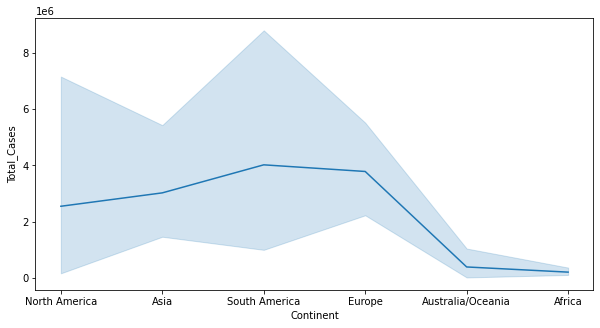

In [13]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'Continent', y = 'Total_Cases', data = df2, markers= ['o'])
plt.show()

In [21]:
#asdf = pd.pivot_table(df2, values = ['Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Active_Cases', 'Country'], index = [['Continent' , 'Country']], aggfunc = max)

In [22]:
df2[df2['Continent'] == 'North America'].max()['Total_Cases']

81900012.0

In [14]:
#top 5 countries with highest total cases, total deaths, total recovered, active cases, serious critical
df4 = df2[['Country', 'Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Active_Cases', 'Serious_Critical' , 'Population', 'Continent', 'New_Cases', 'Total_Tests']]  # creating a new df
df4['%total_cases'] = (df2['Total_Cases'] * 100 )/df2['Population']
df4['%Total_Deaths'] = (df2['Total_Deaths'] * 100 )/df2['Total_Cases']
df4['%Total_Recovered'] = (df2['Total_Recovered'] * 100 )/df2['Total_Cases']
df4['%Active_Cases'] = (df2['Active_Cases'] * 100 )/df2['Total_Cases']
df4['%Serious_Critical'] = (df2['Serious_Critical'] * 100 )/df2['Total_Cases']


C:\Users\hp\AppData\Local\Temp/ipykernel_2468/3307914162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['%total_cases'] = (df2['Total_Cases'] * 100 )/df2['Population']
C:\Users\hp\AppData\Local\Temp/ipykernel_2468/3307914162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['%Total_Deaths'] = (df2['Total_Deaths'] * 100 )/df2['Total_Cases']
C:\Users\hp\AppData\Local\Temp/ipykernel_2468/3307914162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [40]:
df4.head()

,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Population,Continent,New_Cases,Total_Tests,%total_cases,%Total_Deaths,%Total_Recovered,%Active_Cases,%Serious_Critical
1,USA,81900012.0,1009390.0,65968467.0,14922155.0,1767.0,3.344112e+08,North America,0.0,987362808.0,24.490811,1.232466,80.547567,18.219967,0.002158
2,India,43030925.0,521518.0,42497567.0,11840.0,8944.0,1.403828e+09,Asia,0.0,791546038.0,3.065255,1.211961,98.760524,0.027515,0.020785
3,Brazil,30040129.0,660586.0,28892353.0,487190.0,8318.0,2.152127e+08,South America,0.0,63776166.0,13.958341,2.199012,96.179191,1.621797,0.027690
4,France,26228521.0,142784.0,23615663.0,2470074.0,1541.0,6.552716e+07,Europe,0.0,254106036.0,40.026949,0.544384,90.038104,9.417512,0.005875
5,Germany,21956282.0,130969.0,17675700.0,4149613.0,2494.0,8.425441e+07,Europe,0.0,104701826.0,26.059505,0.596499,80.504067,18.899434,0.011359


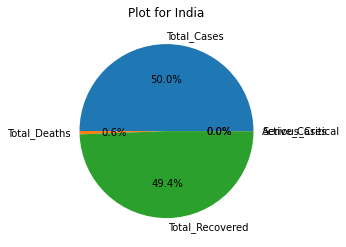

In [103]:
# plot for differenct parameters for india
india = pd.DataFrame(df4.iloc[1, 1:6])
india_row_label = india.index
india_row_label
india_values = india[2].values
#india_values
#plt.subplot(1,2,1)
plt.pie(india_values, labels = india_row_label,autopct='%1.1f%%')
plt.title('Plot for India')
plt.savefig('indiastats.png')

<function matplotlib.pyplot.show(close=None, block=None)>

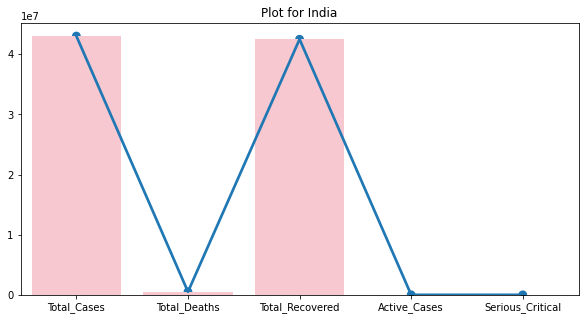

In [132]:
#SCATTER plot
#plt.subplot(1,2,2)
plt.figure(figsize = (10, 5))
c = sns.scatterplot(x = india_row_label, y = india_values, data = india)
c = sns.pointplot(x = india_row_label, y = india_values, data = india)
c = sns.barplot(x = india_row_label, y = india_values, data = india, color = 'pink')
plt.title('Plot for India')
plt.savefig('barplot_india.png')
plt.show

In [105]:
#% plots for for india in % values
#india = pd.DataFrame(df4.iloc[1])
x = pd.DataFrame(df4.iloc[1, 10:])

data = x.index
data
colu = list(x[2].values)
#plt.figure(figsize = (12,5))
#plt.subplot(1,2,1)
#v = plt.pie(colu, labels=data,  autopct= '%0.4f%%')


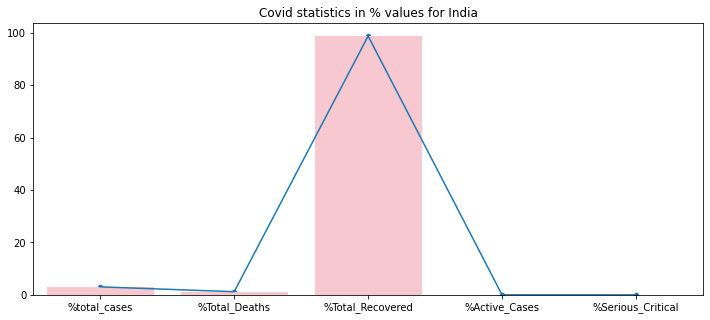

In [122]:
# scatter plot for %values for India
#plt.subplot(1,2,2)
plt.figure(figsize = (12,5))
a = sns.scatterplot(x = data, y = colu, data = x)
a = sns.lineplot(x = data, y = colu, data = x)
a = sns.barplot(x = data, y = colu, data = x, color = 'pink')
plt.title('Covid statistics in % values for India')
plt.savefig('bar_india_stats.jpeg')
plt.show()


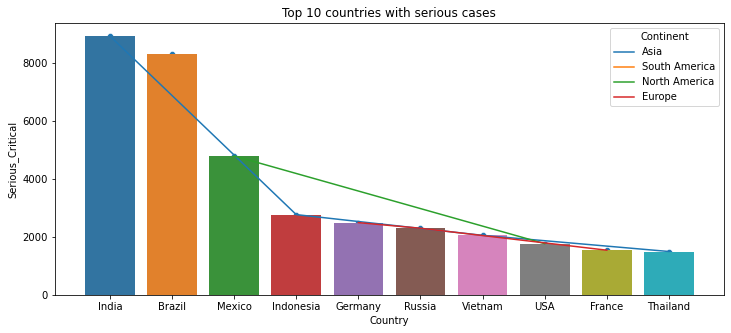

In [25]:
# bargraph for top 10 countries with highest Serious_Critical cases
Serious_Critical = df4.sort_values(by = 'Serious_Critical' , ascending = False).head(10)
Serious_Critical
plt.figure(figsize = (12,5))
sns.barplot(x = 'Country', y = 'Serious_Critical',  dodge=False, data = Serious_Critical)
sns.scatterplot(x = 'Country', y = 'Serious_Critical', data = Serious_Critical)
sns.lineplot(x = 'Country', y = 'Serious_Critical', hue = 'Continent', data = Serious_Critical)
plt.title('Top 10 countries with serious cases')
plt.show()

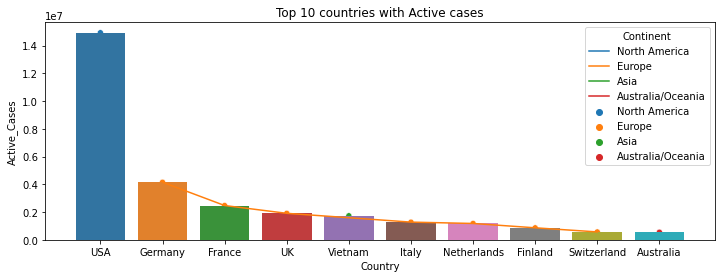

In [116]:
# bargraph for top 10 countries with highest active cases
top_active_cases = df4.sort_values(by = 'Active_Cases' , ascending = False).head(10)
top_active_cases
plt.figure(figsize = (12,4))
sns.barplot(x = 'Country', y = 'Active_Cases', dodge=False, data = top_active_cases)
sns.lineplot(x = 'Country', y = 'Active_Cases', hue = 'Continent', data = top_active_cases)
sns.scatterplot(x = 'Country', y = 'Active_Cases',hue = 'Continent', data = top_active_cases)
plt.title('Top 10 countries with Active cases')
plt.savefig('TopActivecases.png')

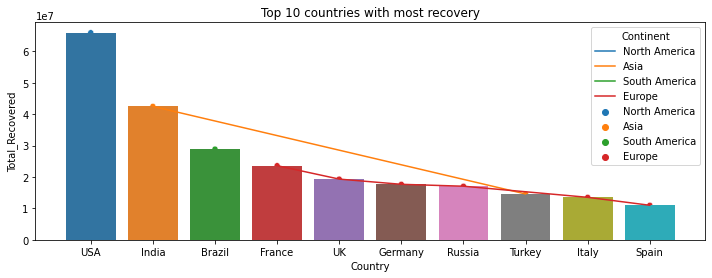

In [123]:
# bargraph for top 10 countries with highest total recovery
top_recovery = df4.sort_values(by = 'Total_Recovered' , ascending = False).head(10)
top_recovery
plt.figure(figsize = (12,4))
sns.barplot(x = 'Country', y = 'Total_Recovered', dodge=False, data = top_recovery)
sns.scatterplot(x = 'Country', y = 'Total_Recovered', hue = 'Continent', data = top_recovery)
sns.lineplot(x = 'Country', y = 'Total_Recovered', hue = 'Continent', data = top_recovery)

plt.title('Top 10 countries with most recovery')

plt.savefig('toprecovery.png')
plt.show()


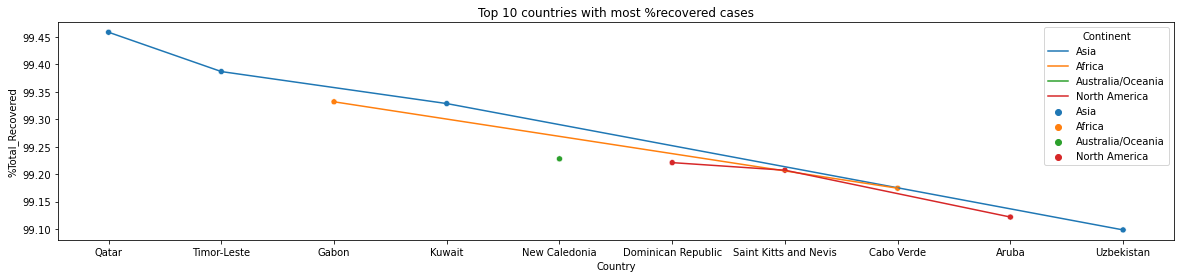

In [108]:
# bargraph for top 10 countries with highest %total recovery (comparing total recovered vs total cases)
recovered_percent = df4.sort_values(by = '%Total_Recovered', ascending = False).head(10)
recovered_percent
plt.figure(figsize = (20,4))
#sns.barplot(x = 'Country', y = '%Total_Recovered', dodge=False, data = recovered_percent)
sns.scatterplot(x = 'Country', y = '%Total_Recovered', hue = 'Continent', data = recovered_percent)
sns.lineplot(x = 'Country', y = '%Total_Recovered', hue = 'Continent', data = recovered_percent)
plt.title('Top 10 countries with most %recovered cases')
plt.show()

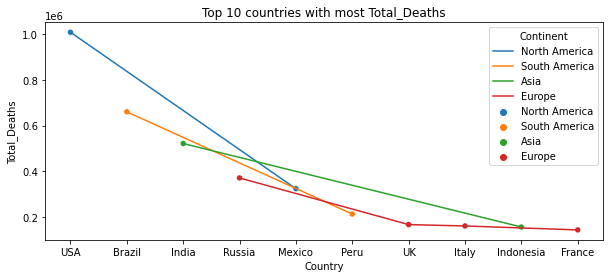

In [125]:
# bargraph for top 10 countries with highest total deaths
top_death = df4.sort_values(by = 'Total_Deaths', ascending = False).head(10)
top_death
plt.figure(figsize = (10,4))
#sns.barplot(x = 'Country', y = 'Total_Deaths', dodge=False, data = top_death)
sns.scatterplot(x = 'Country', y = 'Total_Deaths', hue = 'Continent', data = top_death)
sns.lineplot(x = 'Country', y = 'Total_Deaths', hue = 'Continent', data = top_death)
plt.title('Top 10 countries with most Total_Deaths')
plt.savefig('topdeath.png')
plt.show()

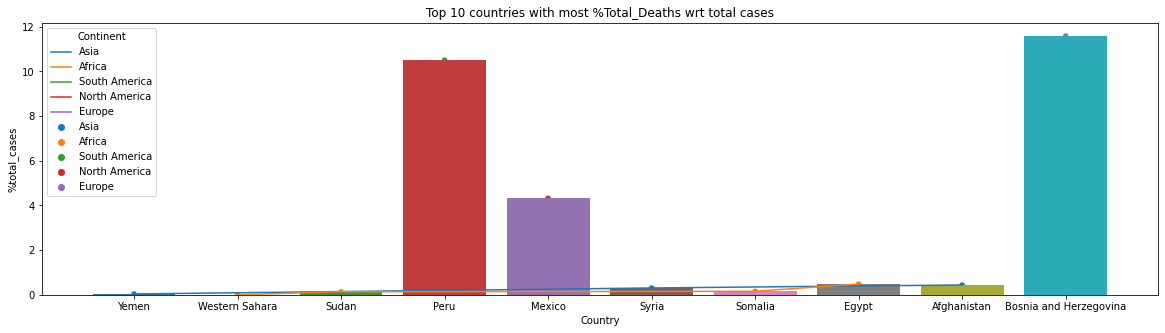

In [29]:
# bargraph for top 10 countries with highest %Total_Deaths (comparing total death vs total cases)
death_percent = df4.sort_values(by = '%Total_Deaths', ascending = False).head(10)
death_percent
plt.figure(figsize = (20,5))
sns.barplot(x = 'Country', y = '%total_cases', dodge=False, data = death_percent)
sns.scatterplot(x = 'Country', y = '%total_cases', hue = 'Continent', data = death_percent)
sns.lineplot(x = 'Country', y = '%total_cases', hue = 'Continent', data = death_percent)
plt.title('Top 10 countries with most %Total_Deaths wrt total cases')
plt.show()

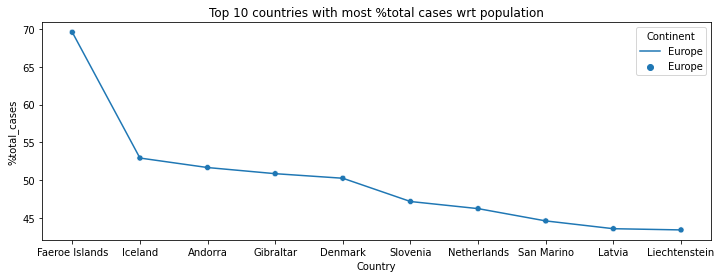

In [170]:
# bargraph for top 10 countries with highest %total cases
topcases_percent = df4.sort_values(by = '%total_cases', ascending = False).head(10)
topcases_percent
plt.figure(figsize = (12,4))
#sns.barplot(x = 'Country', y = '%total_cases', dodge=False, data = topcases_percent)
sns.scatterplot(x = 'Country', y = '%total_cases', hue = 'Continent', data = topcases_percent)
sns.lineplot(x = 'Country', y = '%total_cases', hue = 'Continent', data = topcases_percent)
plt.title('Top 10 countries with most %total cases wrt population')
plt.show()
#finding-top 10 countries with highest %total cases (totalcases/population) are from europe continent

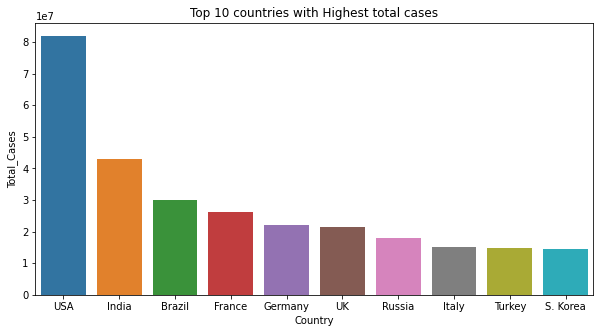

In [126]:
top_covid_cases = df4.sort_values(by = 'Total_Cases', ascending = False).head(10)
top_covid_cases
plt.figure(figsize = (10,5))
#sns.lineplot(x = 'Country', y = 'Total_Cases', data = top_covid_cases, hue = 'Continent')
#sns.scatterplot(x = 'Country', y = 'Total_Cases', data = top_covid_cases, hue = 'Continent')
sns.barplot(x = 'Country', y = 'Total_Cases', data = top_covid_cases)
plt.title('Top 10 countries with Highest total cases')
plt.savefig('topcases.png')


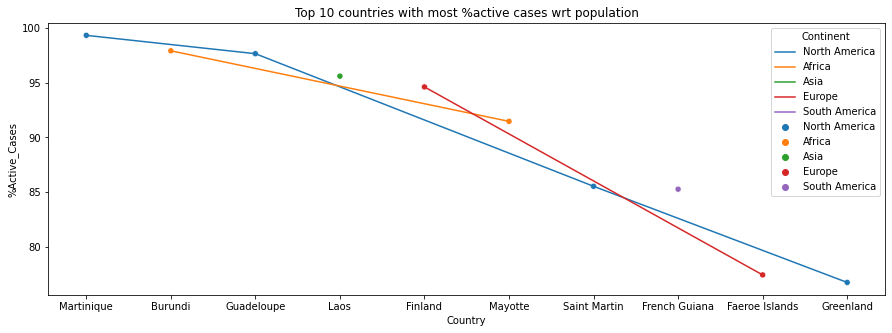

In [37]:
# bargraph for top 10 countries with highest %active cases
topactive_percent = df4.sort_values(by = '%Active_Cases', ascending = False).head(10)
topactive_percent
plt.figure(figsize = (15,5))
#sns.barplot(x = 'Country', y = '%Active_Cases', dodge=False, data = topactive_percent)
sns.scatterplot(x = 'Country', y = '%Active_Cases', hue = 'Continent', data = topactive_percent)
sns.lineplot(x = 'Country', y = '%Active_Cases', hue = 'Continent', data = topactive_percent)
plt.title('Top 10 countries with most %active cases wrt population')
plt.show()

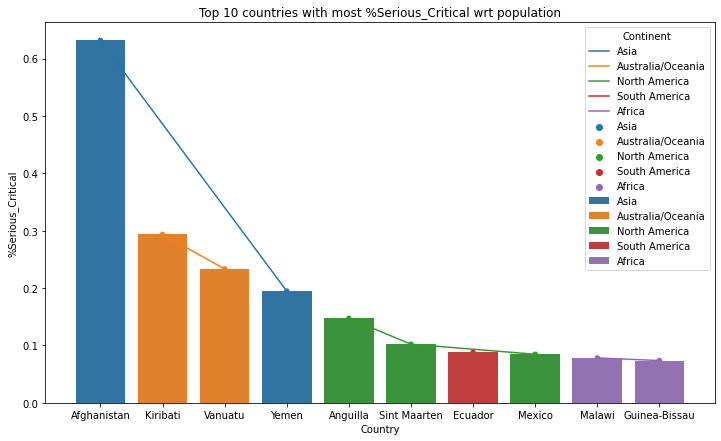

In [30]:
# bargraph for top 10 countries with highest % serious cases
topserious_percent = df4.sort_values(by = '%Serious_Critical', ascending = False).head(10)
topserious_percent
plt.figure(figsize = (12,7))
sns.barplot(x = 'Country', y = '%Serious_Critical',  data = topserious_percent, dodge=False, hue = 'Continent')
sns.scatterplot(x = 'Country', y = '%Serious_Critical', hue = 'Continent', data = topserious_percent)
sns.lineplot(x = 'Country', y = '%Serious_Critical', hue = 'Continent', data = topserious_percent)
plt.title('Top 10 countries with most %Serious_Critical wrt population')
plt.show()

In [41]:
# dataframe with avg values across total cases, deaths, recovered, active and serious cases across the continents
df5 = df4.groupby('Continent')[['Total_Cases', 'Total_Deaths', 'Total_Recovered','Active_Cases','Serious_Critical']].mean().sort_values( by = 'Total_Cases', ascending = False)
df5.to_csv('meanvalue.csv')

In [85]:
# analysis on avg values
meanvalue_table = pd.read_csv('meanvalue.csv')

meanvalue_table = meanvalue_table.set_index('Continent') # make continent column as index

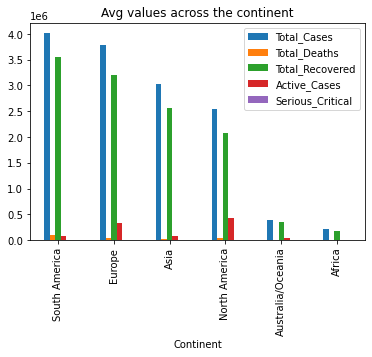

In [180]:
#a = meanvalue_table.plot.line()

a = meanvalue_table.plot.bar()
plt.title('Avg values across the continent')
plt.savefig('mean_value_graph.png', bbox_inches = 'tight') # bbox_inches adujst the size and donot strip labels


<AxesSubplot:xlabel='Continent'>

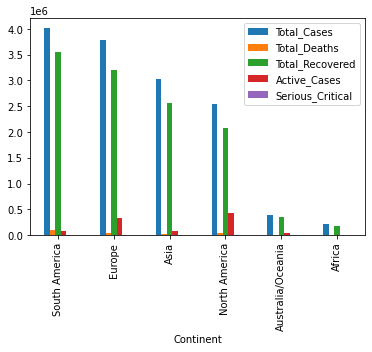

In [45]:
#continent wise 
df5.plot(kind = 'bar')

In [46]:
df4.head(4)

,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Population,Continent,New_Cases,Total_Tests,%total_cases,%Total_Deaths,%Total_Recovered,%Active_Cases,%Serious_Critical
1,USA,81900012.0,1009390.0,65968467.0,14922155.0,1767.0,3.344112e+08,North America,0.0,987362808.0,24.490811,1.232466,80.547567,18.219967,0.002158
2,India,43030925.0,521518.0,42497567.0,11840.0,8944.0,1.403828e+09,Asia,0.0,791546038.0,3.065255,1.211961,98.760524,0.027515,0.020785
3,Brazil,30040129.0,660586.0,28892353.0,487190.0,8318.0,2.152127e+08,South America,0.0,63776166.0,13.958341,2.199012,96.179191,1.621797,0.027690
4,France,26228521.0,142784.0,23615663.0,2470074.0,1541.0,6.552716e+07,Europe,0.0,254106036.0,40.026949,0.544384,90.038104,9.417512,0.005875


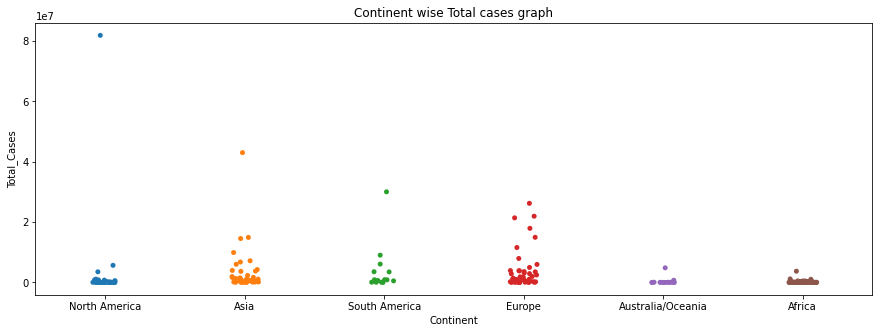

In [128]:
#continent wise plot for total cases
plt.figure(figsize = (15,5))
sns.stripplot(x="Continent", y="Total_Cases",   data=df4)
#sns.boxenplot(x="Continent", y="Total_Cases", data=df4)
#sns.boxplot(x="Continent", y="Total_Cases", data=df4)
plt.title('Continent wise Total cases graph')

plt.savefig('worldcases.png') # plt.savefig should be called before plt.show, if not outputs blank image
plt.show()
# obersevation, many countries in each continent have less cases, only a few countries in each continent have large cases. 
# the same obervation is found in below plots

Text(0.5, 1.0, 'Continent wise total deaths')

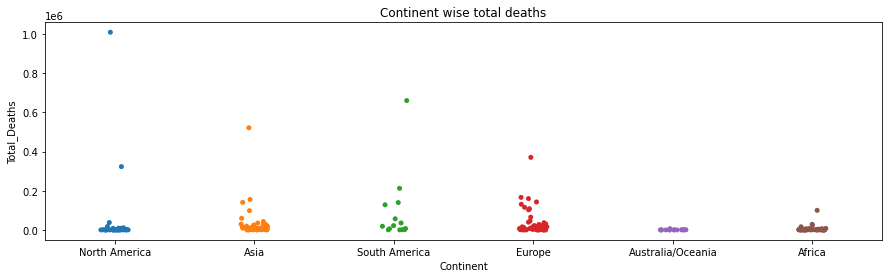

In [53]:
# continent wise total deaths
plt.figure(figsize = (15,4))
b = sns.stripplot(x="Continent", y="Total_Deaths",   data=df4)
#b = sns.boxenplot(x="Continent", y="Total_Deaths",   data=df4)
#very few countries in each continent  have large deaths
plt.title('Continent wise total deaths')

Text(0.5, 1.0, 'Continent wise Total recovery')

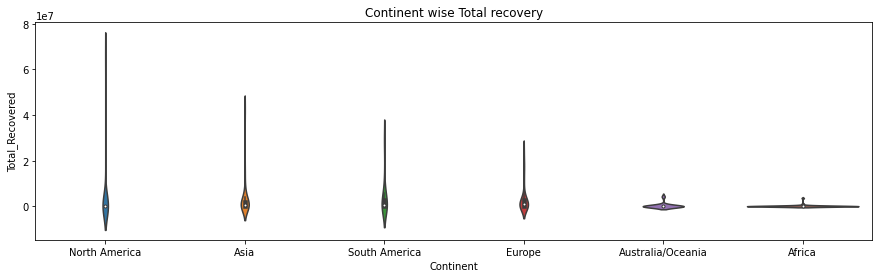

In [56]:
#continent wise totaL recovery
plt.figure(figsize = (15,4))
#sns.boxenplot(x="Continent", y="Total_Recovered",   data=df4)
sns.violinplot(x="Continent", y="Total_Recovered",   data=df4)
plt.title('Continent wise Total recovery')

Text(0.5, 1.0, 'Continent wise Active cases')

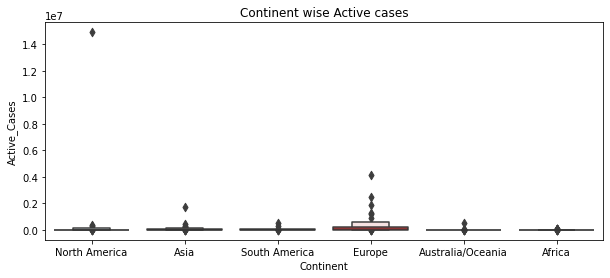

In [58]:
#continent wise Active_Cases
plt.figure(figsize = (10,4))
sns.boxenplot(x="Continent", y="Active_Cases",   data=df4)
#sns.stripplot(x="Continent", y="Active_Cases",   data=df4)
plt.title('Continent wise Active cases')


Text(0.5, 1.0, 'Continent wise Serious critical cases')

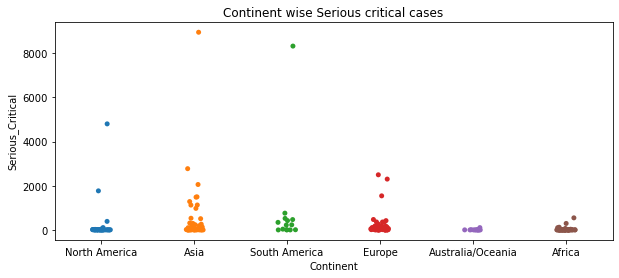

In [62]:
#continent wise Serious_Critical
plt.figure(figsize = (10,4))
#sns.boxenplot(x="Continent", y="Serious_Critical",   data=df4)
sns.stripplot(x="Continent", y="Serious_Critical",   data=df4)
plt.title('Continent wise Serious critical cases')

In [63]:
con = pd.read_csv('continentwise.csv')
con

,Continent,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Population
0,Europe,181555602.0,1779781.0,153823296.0,16093276.0,10432.0,7.484228e+08
1,Asia,142059380.0,1407218.0,120851442.0,4092978.0,24778.0,4.658295e+09
2,North America,96771454.0,1445388.0,79154552.0,16161277.0,7324.0,5.972108e+08
3,South America,56260084.0,1289432.0,49801256.0,1005745.0,11330.0,4.370012e+08
4,Africa,11784785.0,253092.0,9947509.0,477606.0,1341.0,1.396921e+09
5,Australia/Oceania,5855877.0,9479.0,5128912.0,645661.0,149.0,4.326368e+07


In [ ]:
sns.pairplot(con, hue = 'Continent')

In [ ]:
df2.columns

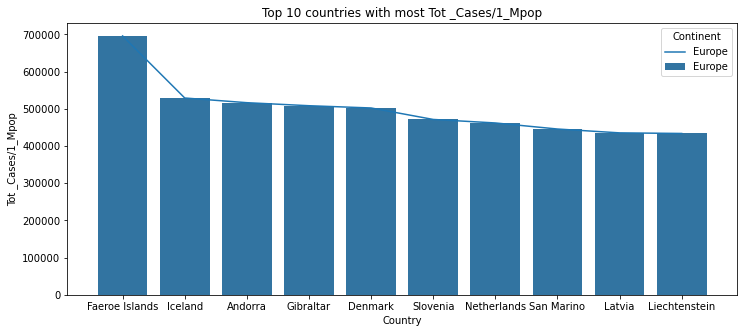

In [31]:
#top 10 countries with highest total case per 1 million popultaion
case_per_million = df2.sort_values(by = 'Tot\xa0_Cases/1_Mpop' , ascending = False).head(10)
case_per_million
plt.figure(figsize = (12,5))
sns.barplot(x = 'Country', y = 'Tot\xa0_Cases/1_Mpop', hue = 'Continent', data = case_per_million, dodge=False)
sns.lineplot(x = 'Country', y = 'Tot\xa0_Cases/1_Mpop', hue = 'Continent', data = case_per_million)
plt.title('Top 10 countries with most Tot _Cases/1_Mpop')
plt.show()

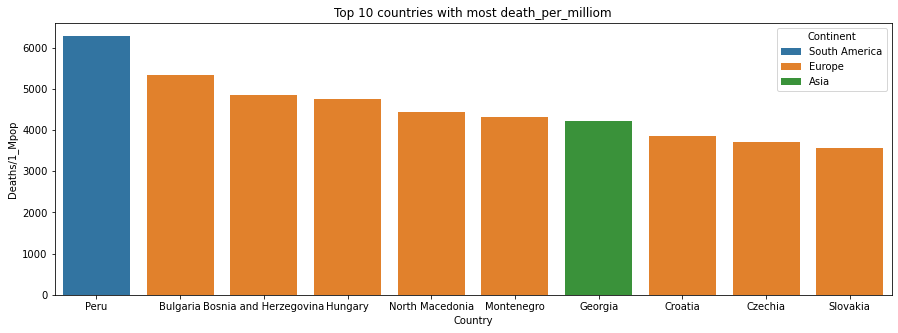

In [100]:
#top 10 countries with highest total death per 1 million poipulation
death_per_milliom = df2.sort_values(by = 'Deaths/1_Mpop' , ascending = False).head(10)
death_per_milliom
plt.figure(figsize = (15,5))
sns.barplot(x = 'Country', y = 'Deaths/1_Mpop',hue='Continent', data = death_per_milliom, dodge=False)
plt.title('Top 10 countries with most death_per_milliom')
plt.show()

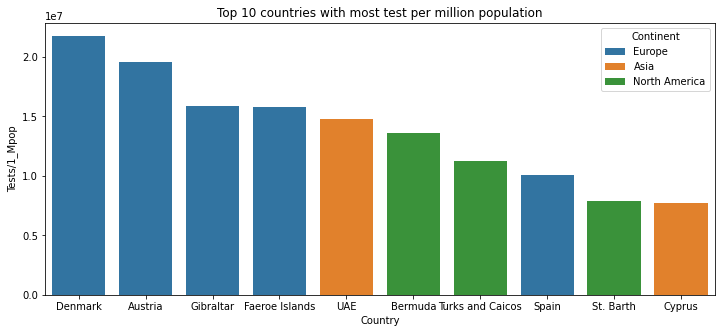

In [96]:
#top 10 countries with highest test per million population
test_per_million = df2.sort_values(by = 'Tests/1_Mpop', ascending = False).head(10)
test_per_million
plt.figure(figsize = (12,5))
sns.barplot(x = 'Country', y = 'Tests/1_Mpop', hue = 'Continent', data = test_per_million, dodge=False)
plt.title('Top 10 countries with most test per million population')
plt.show()

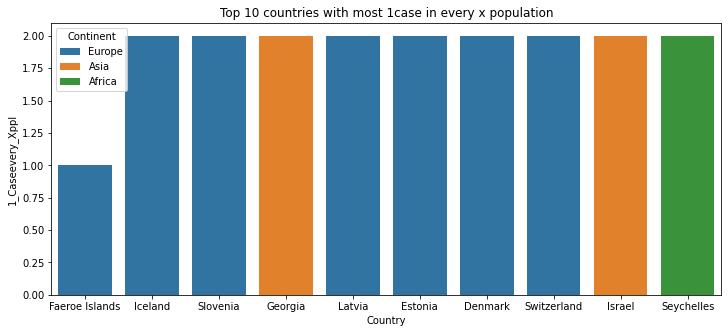

In [93]:
# top 10 countries with highest 1case in every x population
one_case_every = df2.sort_values(by = '1_Caseevery_Xppl', ascending = True).head(10)
one_case_every
plt.figure(figsize = (12,5))
sns.barplot(x = 'Country', y = '1_Caseevery_Xppl', hue = 'Continent', data = one_case_every,dodge=False)
plt.title('Top 10 countries with most 1case in every x population')
plt.show()

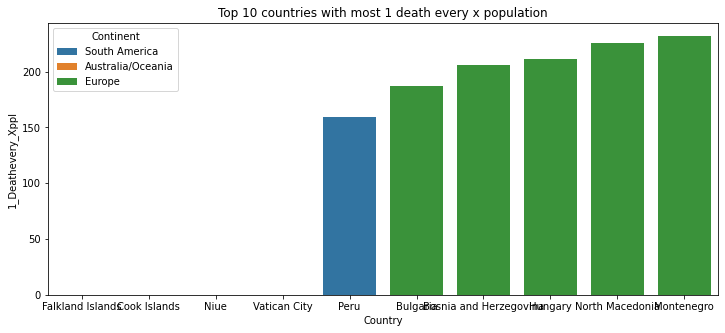

In [34]:
# top 10 countries with 1 death every x population
one_death_every = df2.sort_values(by = '1_Deathevery_Xppl', ascending = True).head(10)
one_death_every
plt.figure(figsize = (12,5))
sns.barplot(x = 'Country', y = '1_Deathevery_Xppl', hue = 'Continent', data = one_death_every, dodge=False)
plt.title('Top 10 countries with most 1 death every x population')
plt.show()

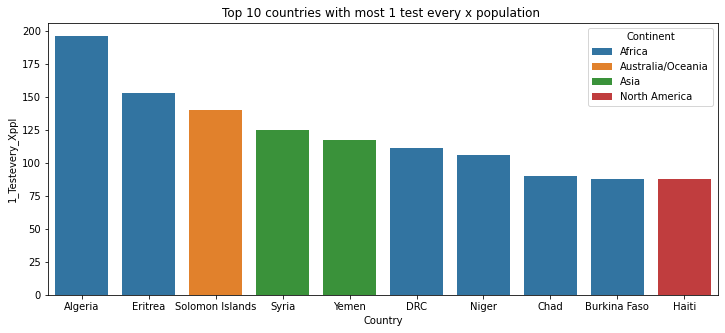

In [105]:
# top 10 countries with 1 test every x population 
one_test_every = df2.sort_values(by = '1_Testevery_Xppl', ascending = False).head(10)
one_test_every
plt.figure(figsize = (12,5))
sns.barplot(x = 'Country', y = '1_Testevery_Xppl', hue = 'Continent', data = one_test_every, dodge=False)
plt.title('Top 10 countries with most 1 test every x population ')
plt.show()

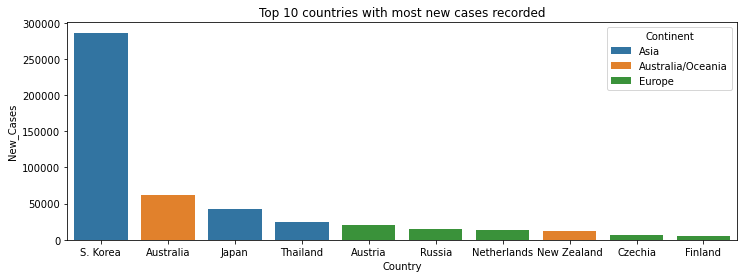

In [129]:
# top 10 coutries with new cases
newcases = df4.sort_values(by = 'New_Cases' , ascending = False).head(10)
newcases
plt.figure(figsize = (12,4))
sns.barplot(x = 'Country', y = 'New_Cases', hue = 'Continent', data = newcases, dodge=False)
plt.title('Top 10 countries with most new cases recorded')

plt.savefig('topnewcases.png')
plt.show()

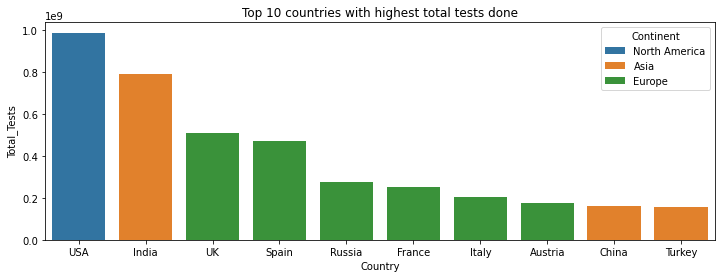

In [130]:
# top 10 countries with highest total tests done
hightests = df4.sort_values(by = 'Total_Tests' , ascending = False).head(10)
hightests
plt.figure(figsize = (12,4))
sns.barplot(x = 'Country', y = 'Total_Tests', hue = 'Continent', data = hightests, dodge=False)
plt.title('Top 10 countries with highest total tests done')

plt.savefig('tests.png')
plt.show()

In [ ]:
continent_top_cases = df4.groupby('Continent')
continent_top_cases.head(3).sort_values(by = 'Total_Cases', ascending = False)
continent_top_cases.get_group('Asia').head(3).sort_values(by = 'Total_Cases', ascending = False)

In [ ]:
#continent_top_cases.get_group('Europe').head(3).sort_values(by = 'Total_Cases', ascending = False)

In [ ]:
#continent_top_cases.get_group('North America').head(3).sort_values(by = 'Total_Cases', ascending = False)

In [ ]:
#continent_top_cases.get_group('South America').head(3).sort_values(by = 'Total_Cases', ascending = False)

In [ ]:
#continent_top_cases.get_group('Africa').head(3).sort_values(by = 'Total_Cases', ascending = False)

In [ ]:
#ontinent_top_cases.get_group('Australia/Oceania').head(3).sort_values(by = 'Total_Cases', ascending = False).plot(kind = 'bar')

Text(0.5, 1.0, 'Top 3 countries in each continent with highest cases')

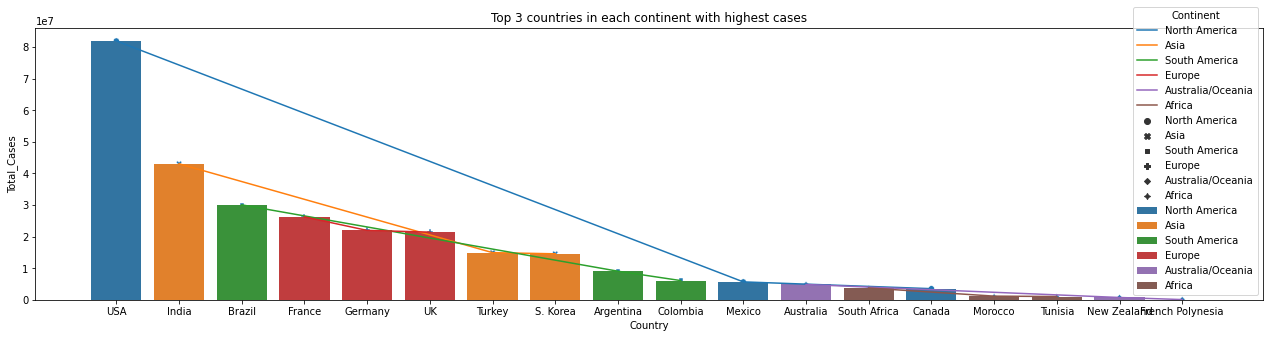

In [36]:
continent_top_cases = df4.groupby('Continent')
continent_top_cases = continent_top_cases.head(3).sort_values(by = 'Total_Cases', ascending = False)
plt.figure(figsize = (22,5))
abc = sns.barplot(x = 'Country', y = 'Total_Cases', data = continent_top_cases, dodge=False, hue = 'Continent')
abc = sns.lineplot(x = 'Country', y = 'Total_Cases', data = continent_top_cases, hue = 'Continent')
abc = sns.scatterplot(x = 'Country', y = 'Total_Cases', data = continent_top_cases,  style = 'Continent')
plt.title('Top 3 countries in each continent with highest cases')

Text(0.5, 1.0, 'Top 3 countries in each continent with highest deaths')

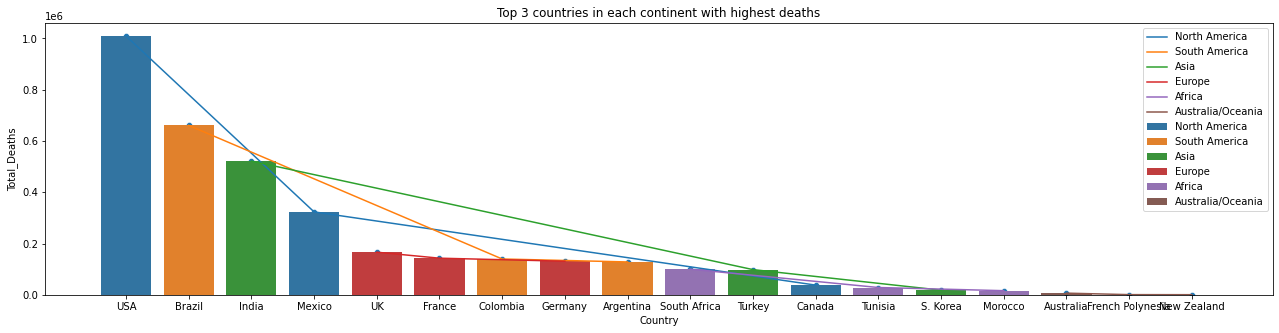

In [37]:
continent_top_death = df4.groupby('Continent')
continent_top_death = continent_top_death.head(3).sort_values(by = 'Total_Deaths', ascending = False)
plt.figure(figsize = (22,5))
abc = sns.barplot(x = 'Country', y = 'Total_Deaths', data = continent_top_death, dodge=False, hue = "Continent")
abc = sns.lineplot(x = 'Country', y = 'Total_Deaths', data = continent_top_death , hue = 'Continent')
abc = sns.scatterplot(x = 'Country', y = 'Total_Deaths', data = continent_top_death)
plt.title('Top 3 countries in each continent with highest deaths')

Text(0.5, 1.0, 'Top 3 countries in each continent with highest Total Recovered')

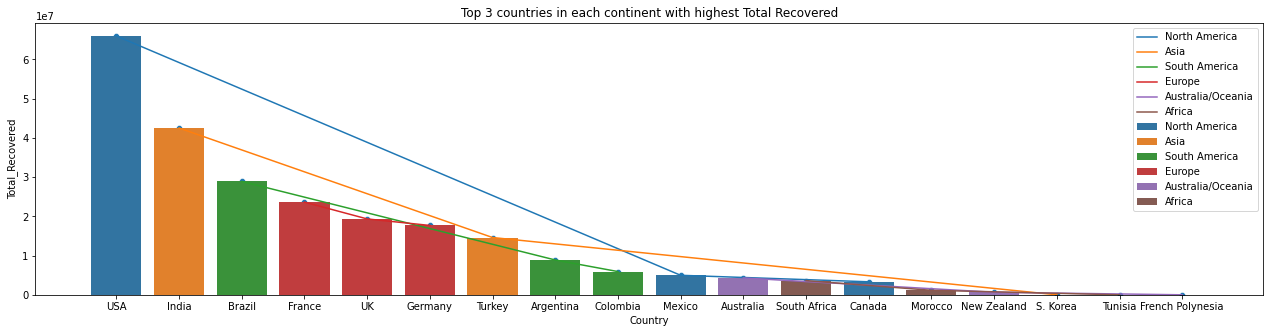

In [38]:
continent_top_recovered = df4.groupby('Continent')
continent_top_recovered = continent_top_recovered.head(3).sort_values(by = 'Total_Recovered', ascending = False)
plt.figure(figsize = (22,5))
abc = sns.barplot(x = 'Country', y = 'Total_Recovered', data = continent_top_recovered, dodge=False, hue = "Continent")
abc = sns.lineplot(x = 'Country', y = 'Total_Recovered', data = continent_top_recovered , hue = 'Continent')
abc = sns.scatterplot(x = 'Country', y = 'Total_Recovered', data = continent_top_recovered)
plt.title('Top 3 countries in each continent with highest Total Recovered')

Text(0.5, 1.0, 'Top 3 countries in each continent with highest Total serious cases')

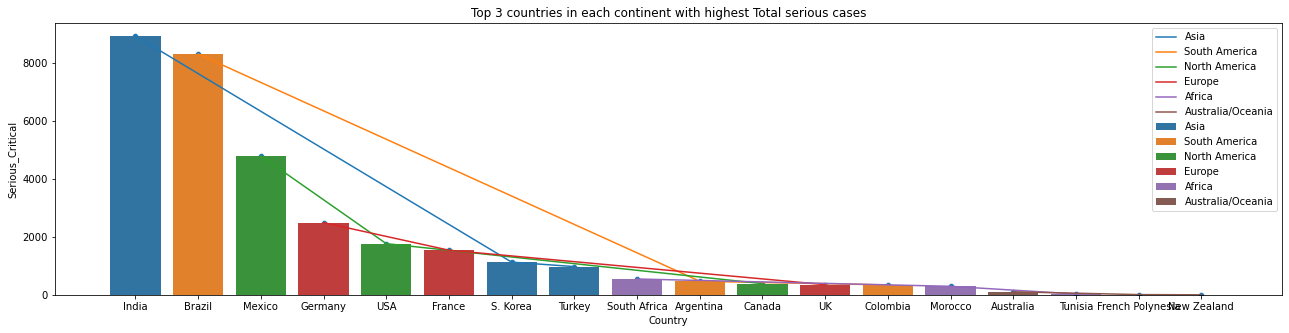

In [39]:
continent_top_serious = df4.groupby('Continent')
continent_top_serious = continent_top_serious.head(3).sort_values(by = 'Serious_Critical', ascending = False)
plt.figure(figsize = (22,5))
abc = sns.barplot(x = 'Country', y = 'Serious_Critical', data = continent_top_serious, dodge=False, hue = "Continent")
abc = sns.lineplot(x = 'Country', y = 'Serious_Critical', data = continent_top_serious , hue = 'Continent')
abc = sns.scatterplot(x = 'Country', y = 'Serious_Critical', data = continent_top_serious)
plt.title('Top 3 countries in each continent with highest Total serious cases')

In [119]:
df4.head()

,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Population,Continent,New_Cases,Total_Tests,%total_cases,%Total_Deaths,%Total_Recovered,%Active_Cases,%Serious_Critical
1,USA,81900012.0,1009390.0,65968467.0,14922155.0,1767.0,3.344112e+08,North America,0.0,987362808.0,24.490811,1.232466,80.547567,18.219967,0.002158
2,India,43030925.0,521518.0,42497567.0,11840.0,8944.0,1.403828e+09,Asia,0.0,791546038.0,3.065255,1.211961,98.760524,0.027515,0.020785
3,Brazil,30040129.0,660586.0,28892353.0,487190.0,8318.0,2.152127e+08,South America,0.0,63776166.0,13.958341,2.199012,96.179191,1.621797,0.027690
4,France,26228521.0,142784.0,23615663.0,2470074.0,1541.0,6.552716e+07,Europe,0.0,254106036.0,40.026949,0.544384,90.038104,9.417512,0.005875
5,Germany,21956282.0,130969.0,17675700.0,4149613.0,2494.0,8.425441e+07,Europe,0.0,104701826.0,26.059505,0.596499,80.504067,18.899434,0.011359


In [109]:
#this conveys the same info as the bar graph plotted earlier with avg values
meanvalue_table = pd.read_csv('meanvalue.csv')
meanvalue_table

,Continent,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical
0,South America,4.018577e+06,92102.285714,3.557233e+06,71838.928571,809.285714
1,Europe,3.782408e+06,37078.770833,3.204652e+06,335276.583333,217.333333
2,Asia,3.022540e+06,29940.808511,2.571307e+06,87084.638298,527.191489
3,North America,2.546617e+06,38036.526316,2.083015e+06,425296.763158,192.736842
4,Australia/Oceania,3.903918e+05,631.933333,3.419275e+05,43044.066667,9.933333
5,Africa,2.067506e+05,4440.210526,1.745177e+05,8379.052632,23.526316


Text(0.5, 1.0, 'Avg values for the continent South America')

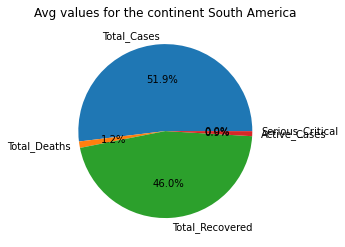

In [133]:
x = pd.DataFrame(meanvalue_table.iloc[0][1:])
list(x.index)
list(x[0].values)
plt.pie(list(x[0].values), labels = list(x.index),autopct='%1.1f%%')
plt.title("Avg values for the continent South America")


Text(0.5, 1.0, 'Avg values for the continent Europe')

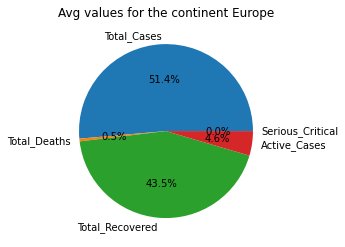

In [137]:
y = pd.DataFrame(meanvalue_table.iloc[1][1:])
list(y.index)
list(y[1].values)
plt.pie(list(y[1].values), labels = list(y.index),autopct='%1.1f%%')
plt.title("Avg values for the continent Europe")

Text(0.5, 1.0, 'Avg values for the continent Asia')

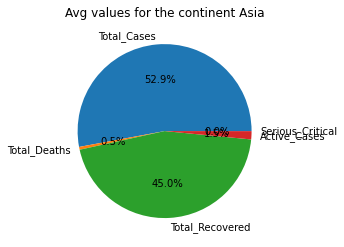

In [142]:
z = pd.DataFrame(meanvalue_table.iloc[2][1:])
list(z.index)
list(z[2].values)
plt.pie(list(z[2].values), labels = list(z.index),autopct='%1.1f%%')
plt.title("Avg values for the continent Asia")

Text(0.5, 1.0, 'Avg values for the continent North America')

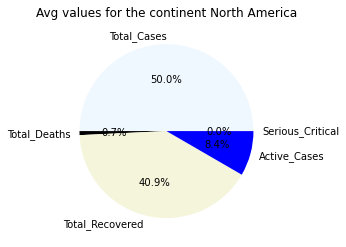

In [163]:
a = pd.DataFrame(meanvalue_table.iloc[3][1:])
list(a.index)
list(a[3].values)
plt.pie(list(a[3].values), labels = list(a.index),autopct='%1.1f%%', colors = ['AliceBlue', 'Black', 'Beige', 'Blue', 'Red' ] )
plt.title("Avg values for the continent North America")

Text(0.5, 1.0, 'Avg values for the continent Australia/Oceania')

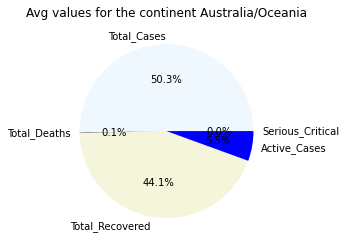

In [160]:
b = pd.DataFrame(meanvalue_table.iloc[4][1:])
list(b.index)
list(b[4].values)
plt.pie(list(b[4].values), labels = list(b.index),autopct='%1.1f%%', colors = ['AliceBlue', 'Black', 'Beige', 'Blue', 'Red' ])
plt.title("Avg values for the continent Australia/Oceania")

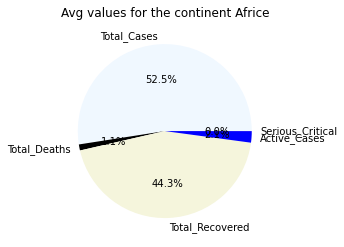

In [159]:
c = pd.DataFrame(meanvalue_table.iloc[5][1:])
list(c.index)
list(c[5].values)
plt.pie(list(c[5].values), labels = list(c.index),autopct='%1.1f%%', colors = ['AliceBlue', 'Black', 'Beige', 'Blue', 'Red' ])
plt.title("Avg values for the continent Africe")
plt.savefig('books_read.png')


In [15]:
df4.head()

,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Population,Continent,New_Cases,Total_Tests,%total_cases,%Total_Deaths,%Total_Recovered,%Active_Cases,%Serious_Critical
1,USA,81900012.0,1009390.0,65968467.0,14922155.0,1767.0,3.344112e+08,North America,0.0,987362808.0,24.490811,1.232466,80.547567,18.219967,0.002158
2,India,43030925.0,521518.0,42497567.0,11840.0,8944.0,1.403828e+09,Asia,0.0,791546038.0,3.065255,1.211961,98.760524,0.027515,0.020785
3,Brazil,30040129.0,660586.0,28892353.0,487190.0,8318.0,2.152127e+08,South America,0.0,63776166.0,13.958341,2.199012,96.179191,1.621797,0.027690
4,France,26228521.0,142784.0,23615663.0,2470074.0,1541.0,6.552716e+07,Europe,0.0,254106036.0,40.026949,0.544384,90.038104,9.417512,0.005875
5,Germany,21956282.0,130969.0,17675700.0,4149613.0,2494.0,8.425441e+07,Europe,0.0,104701826.0,26.059505,0.596499,80.504067,18.899434,0.011359


In [16]:
df4.corr()

,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Population,New_Cases,Total_Tests,%total_cases,%Total_Deaths,%Total_Recovered,%Active_Cases,%Serious_Critical
Total_Cases,1.000000,0.913839,0.984534,0.828385,0.619787,0.428747,0.131306,0.885177,0.122713,-0.038913,0.043901,-0.051537,-0.037424
Total_Deaths,0.913839,1.000000,0.916330,0.713085,0.728205,0.426999,0.003896,0.772885,0.028872,0.078168,0.041356,-0.065212,-0.002278
Total_Recovered,0.984534,0.916330,1.000000,0.782748,0.663148,0.463577,0.005510,0.896150,0.109253,-0.038140,0.107765,-0.056113,-0.034128
Active_Cases,0.828385,0.713085,0.782748,1.000000,0.201930,0.153259,0.001097,0.699575,0.115448,-0.040258,-0.000470,0.052944,-0.031805
Serious_Critical,0.619787,0.728205,0.663148,0.201930,1.000000,0.556667,0.078261,0.498037,-0.039979,0.069405,0.067224,-0.076076,0.109410
Population,0.428747,0.426999,0.463577,0.153259,0.556667,1.000000,0.017552,0.541001,-0.138067,0.077717,0.055988,-0.048841,0.042774
New_Cases,0.131306,0.003896,0.005510,0.001097,0.078261,0.017552,1.000000,0.013711,0.079549,-0.075440,-0.156206,-0.035566,-0.019647
Total_Tests,0.885177,0.772885,0.896150,0.699575,0.498037,0.541001,0.013711,1.000000,0.107597,-0.050368,0.073330,-0.048704,-0.040043
%total_cases,0.122713,0.028872,0.109253,0.115448,-0.039979,-0.138067,0.079549,0.107597,1.000000,-0.375485,-0.067448,0.092923,-0.120283
%Total_Deaths,-0.038913,0.078168,-0.038140,-0.040258,0.069405,0.077717,-0.075440,-0.050368,-0.375485,1.000000,-0.034420,-0.118849,0.229181


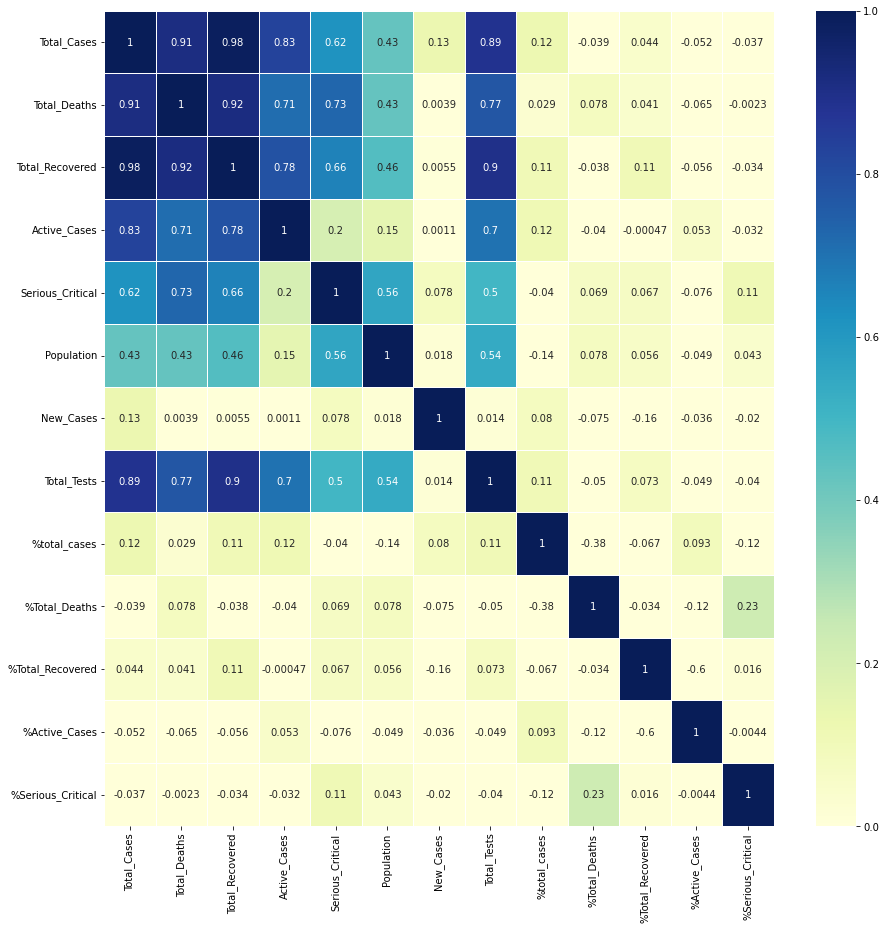

In [24]:
plt.figure(figsize = (15,15))
sns.heatmap(df4.corr(), annot = True, cmap = 'YlGnBu' , linewidths=.5, vmin=0, vmax=1)  #linewidths=Add lines between each cell:
plt.savefig('covid_correlation.png')  #vmin=0, vmax=1 Change the limits of the colormap


Text(0.5, 1.0, 'world statistics')

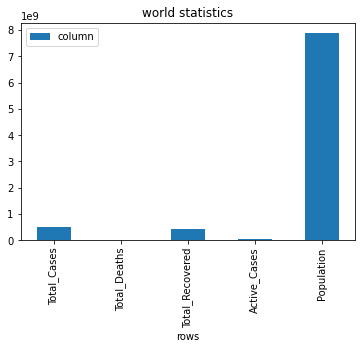

In [101]:
world_population = df2['Population'].sum()
world_population

# world statistics
row = {'rows': ['Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Active_Cases', 'Population'], 
      'column' : [494305558, 6184531, 430003108, 58117919, 7881114596]}
world_data = pd.DataFrame(row)
world_data = world_data.set_index('rows')
world_data.plot.bar()
plt.title('world statistics')

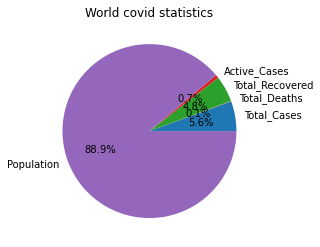

In [131]:
#world statistics
rows =['Total_Cases', 'Total_Deaths', 'Total_Recovered', 'Active_Cases', 'Population'] 
column = [494305558, 6184531, 430003108, 58117919, 7881114596]
plt.pie(column, labels = rows, autopct = '%1.1f%%')
plt.title('World covid statistics')

plt.savefig('worldstats.png')
plt.show()

In [168]:
top_covid_cases1 = df4.sort_values(by = 'Total_Cases', ascending = False).head(10)
top_covid_cases1['case_per_test'] = (top_covid_cases1['Total_Cases']/top_covid_cases1['Total_Tests'])*100

top_covid_cases1

,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Population,Continent,New_Cases,Total_Tests,%total_cases,%Total_Deaths,%Total_Recovered,%Active_Cases,%Serious_Critical,cases/test%,case_per_test
1,USA,81900012.0,1009390.0,65968467.0,14922155.0,1767.0,3.344112e+08,North America,0.0,987362808.0,24.490811,1.232466,80.547567,18.219967,0.002158,8.294824,8.294824
2,India,43030925.0,521518.0,42497567.0,11840.0,8944.0,1.403828e+09,Asia,0.0,791546038.0,3.065255,1.211961,98.760524,0.027515,0.020785,5.436314,5.436314
3,Brazil,30040129.0,660586.0,28892353.0,487190.0,8318.0,2.152127e+08,South America,0.0,63776166.0,13.958341,2.199012,96.179191,1.621797,0.027690,47.102438,47.102438
4,France,26228521.0,142784.0,23615663.0,2470074.0,1541.0,6.552716e+07,Europe,0.0,254106036.0,40.026949,0.544384,90.038104,9.417512,0.005875,10.321880,10.321880
5,Germany,21956282.0,130969.0,17675700.0,4149613.0,2494.0,8.425441e+07,Europe,0.0,104701826.0,26.059505,0.596499,80.504067,18.899434,0.011359,20.970295,20.970295
6,UK,21410305.0,166148.0,19335978.0,1908179.0,351.0,6.851224e+07,Europe,0.0,507870986.0,31.250334,0.776019,90.311549,8.912433,0.001639,4.215698,4.215698
7,Russia,17940765.0,370602.0,17070642.0,499521.0,2300.0,1.460444e+08,Europe,14661.0,273400000.0,12.284464,2.065698,95.150023,2.784279,0.012820,6.562094,6.562094
8,Italy,14966058.0,160103.0,13531567.0,1274388.0,471.0,6.030570e+07,Europe,0.0,204235935.0,24.816987,1.069774,90.415038,8.515188,0.003147,7.327828,7.327828
9,Turkey,14919591.0,98234.0,14598047.0,223310.0,975.0,8.593260e+07,Asia,0.0,154964245.0,17.361968,0.658423,97.844820,1.496757,0.006535,9.627763,9.627763
10,S. Korea,14553644.0,18033.0,0.0,0.0,1128.0,5.134667e+07,Asia,286243.0,15804065.0,28.343891,0.123907,0.000000,0.000000,0.007751,92.087979,92.087979


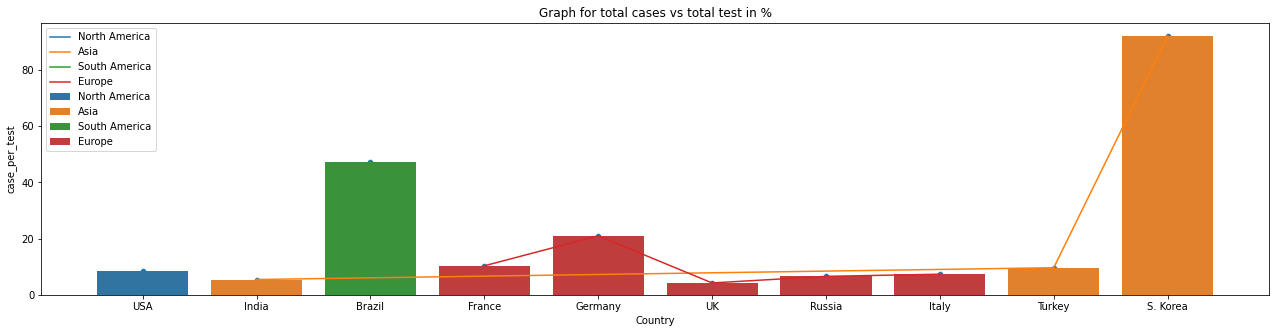

In [172]:


plt.figure(figsize = (22,5))
sns.barplot(x = 'Country', y = 'case_per_test', data = top_covid_cases1, dodge=False, hue = "Continent")
sns.lineplot(x = 'Country', y = 'case_per_test', data = top_covid_cases1 , hue = 'Continent')
sns.scatterplot(x = 'Country', y = 'case_per_test', data = top_covid_cases1)
plt.title('Graph for total cases vs total test in %')
plt.savefig('case_test.png')
plt.show()

In [162]:
top_covid_cases1

,Country,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Population,Continent,New_Cases,Total_Tests,%total_cases,%Total_Deaths,%Total_Recovered,%Active_Cases,%Serious_Critical,cases/test%
1,USA,81900012.0,1009390.0,65968467.0,14922155.0,1767.0,3.344112e+08,North America,0.0,987362808.0,24.490811,1.232466,80.547567,18.219967,0.002158,8.294824
2,India,43030925.0,521518.0,42497567.0,11840.0,8944.0,1.403828e+09,Asia,0.0,791546038.0,3.065255,1.211961,98.760524,0.027515,0.020785,5.436314
3,Brazil,30040129.0,660586.0,28892353.0,487190.0,8318.0,2.152127e+08,South America,0.0,63776166.0,13.958341,2.199012,96.179191,1.621797,0.027690,47.102438
4,France,26228521.0,142784.0,23615663.0,2470074.0,1541.0,6.552716e+07,Europe,0.0,254106036.0,40.026949,0.544384,90.038104,9.417512,0.005875,10.321880
5,Germany,21956282.0,130969.0,17675700.0,4149613.0,2494.0,8.425441e+07,Europe,0.0,104701826.0,26.059505,0.596499,80.504067,18.899434,0.011359,20.970295
6,UK,21410305.0,166148.0,19335978.0,1908179.0,351.0,6.851224e+07,Europe,0.0,507870986.0,31.250334,0.776019,90.311549,8.912433,0.001639,4.215698
7,Russia,17940765.0,370602.0,17070642.0,499521.0,2300.0,1.460444e+08,Europe,14661.0,273400000.0,12.284464,2.065698,95.150023,2.784279,0.012820,6.562094
8,Italy,14966058.0,160103.0,13531567.0,1274388.0,471.0,6.030570e+07,Europe,0.0,204235935.0,24.816987,1.069774,90.415038,8.515188,0.003147,7.327828
9,Turkey,14919591.0,98234.0,14598047.0,223310.0,975.0,8.593260e+07,Asia,0.0,154964245.0,17.361968,0.658423,97.844820,1.496757,0.006535,9.627763
10,S. Korea,14553644.0,18033.0,0.0,0.0,1128.0,5.134667e+07,Asia,286243.0,15804065.0,28.343891,0.123907,0.000000,0.000000,0.007751,92.087979
